# LIBARIES

In [36]:
# File loading and navigation
import os
# File operations
import shutil
# Data manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Train Test Split
from sklearn.model_selection import train_test_split
# Machine Learning
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from keras.applications.vgg16 import VGG16, preprocess_input
# Evaluation
from sklearn.metrics import classification_report

# DATA LOADING

## Data Directory

In [8]:
# Original dataset directory
base_dir = "dataset"
# Dataset directory after splitting
train_dir = "train"
val_dir = "val"
test_dir = "test"

```
Each directory has 2 sub-directories which are classes of images (AI-generated, and Real-images)
```

# EXPLORATORY DATA ANALYSIS (EDA)

## DATA COUNT

### TRAIN, VALIDATION, TEST

In [4]:
def check_path(path):
  labels = os.listdir(path)
  for label in labels:
    num_data = len(os.listdir(os.path.join(path, label)))
    print(f'Total Data - {label} : {num_data}')

print('Train Path')
check_path(train_dir)
print('')

print('Val Path')
check_path(val_dir)
print('')

print('Test Path')
check_path(test_dir)
print('')

Train Path
Total Data - AiArtData : 431
Total Data - RealArt : 348

Val Path
Total Data - AiArtData : 54
Total Data - RealArt : 44

Test Path
Total Data - AiArtData : 54
Total Data - RealArt : 44



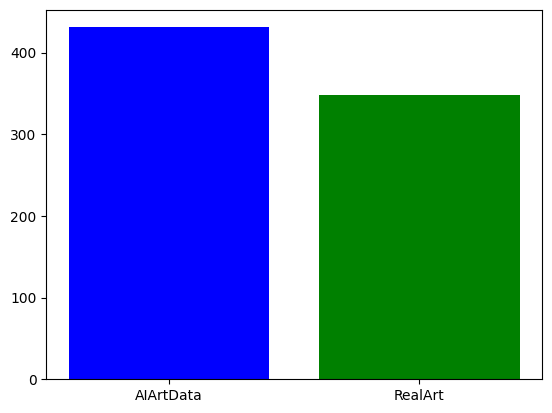

In [5]:
# Train Path
AI_total = len(os.listdir(os.path.join(train_dir, 'AiArtData')))
Real_total = len(os.listdir(os.path.join(train_dir, 'RealArt')))

categories = ['AIArtData', 'RealArt']
totals = [AI_total, Real_total]

plt.bar(categories,totals, color=['blue', 'green'])
plt.show()

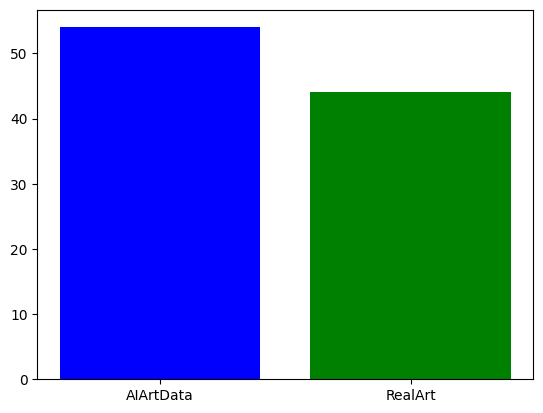

In [6]:
# Validation Path
AI_total = len(os.listdir(os.path.join(val_dir, 'AiArtData')))
Real_total = len(os.listdir(os.path.join(val_dir, 'RealArt')))

categories = ['AIArtData', 'RealArt']
totals = [AI_total, Real_total]

plt.bar(categories,totals, color=['blue', 'green'])
plt.show()

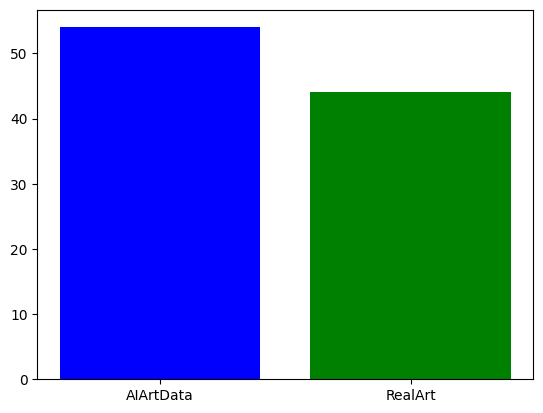

In [7]:
# Test Path
AI_total = len(os.listdir(os.path.join(test_dir, 'AiArtData')))
Real_total = len(os.listdir(os.path.join(test_dir, 'RealArt')))

categories = ['AIArtData', 'RealArt']
totals = [AI_total, Real_total]

plt.bar(categories,totals, color=['blue', 'green'])
plt.show()

### ORIGINAL

In [8]:
# Total data
AI_total = len(os.listdir(os.path.join(train_dir, 'AiArtData'))) + len(os.listdir(os.path.join(val_dir, 'AiArtData'))) + len(os.listdir(os.path.join(test_dir, 'AiArtData')))
Real_total = len(os.listdir(os.path.join(train_dir, 'RealArt'))) + len(os.listdir(os.path.join(val_dir, 'RealArt'))) + len(os.listdir(os.path.join(test_dir, 'RealArt')))

print('Original Total Data - AIArtData :',AI_total)
print('Original Total Data - RealArt :',Real_total)


Original Total Data - AIArtData : 539
Original Total Data - RealArt : 436


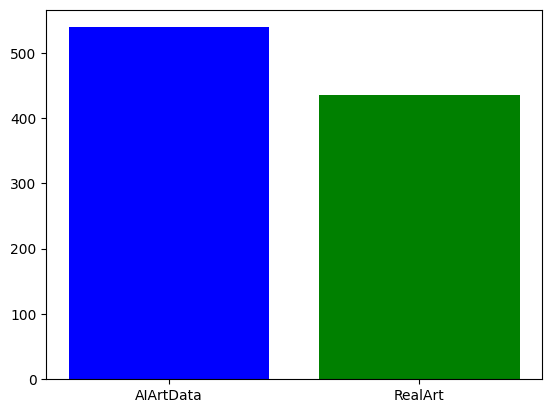

In [9]:
categories = ['AIArtData', 'RealArt']
totals = [AI_total, Real_total]

plt.bar(categories,totals, color=['blue', 'green'])
plt.show()

## DATA VISUALIZATION

### FUNCTION TO VISUALIZE THE FIRST 5 IMAGES FROM EACH CLASS

In [10]:
def plot_images(path):
  labels = os.listdir(path)
  for label in labels:
    folder_path = os.path.join(path, label)
    fig = plt.figure(figsize=(20, 20))
    columns = 5
    rows = 1
    print('Class : ', label)
    images = os.listdir(folder_path)
    for index in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, index)
        image = plt.imread(os.path.join(folder_path, images[index]))
        plt.imshow(image)
        plt.axis("off")
    plt.show()

### TRAIN

Class :  AiArtData


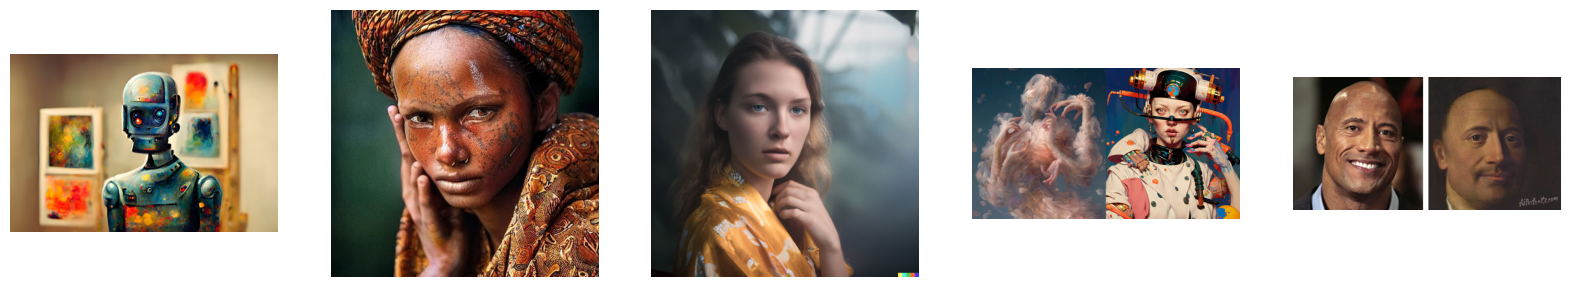

Class :  RealArt


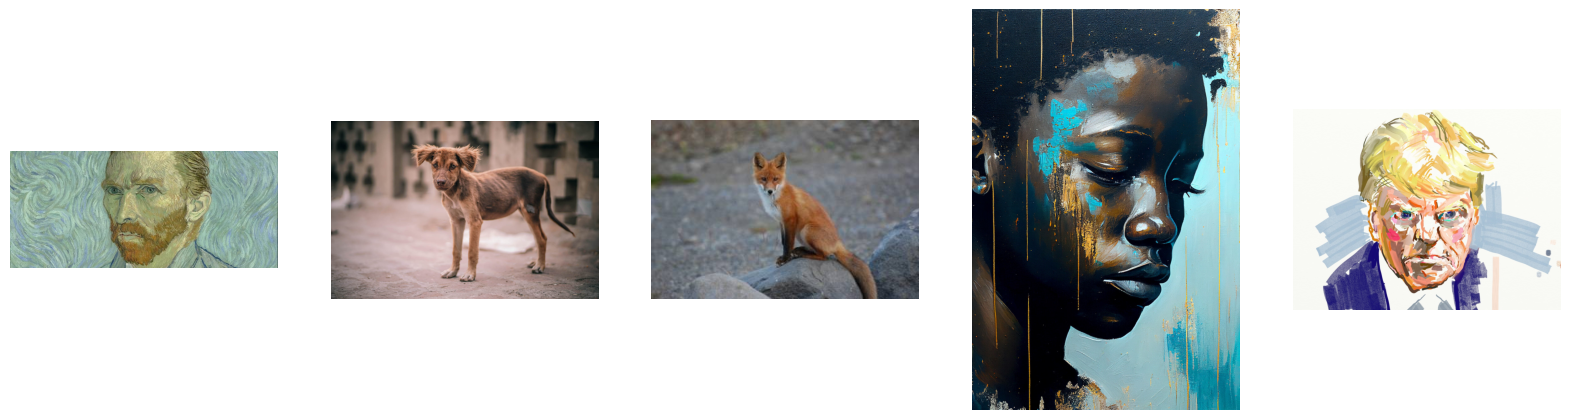

In [11]:
plot_images(train_dir)

### VALIDATION

Class :  AiArtData


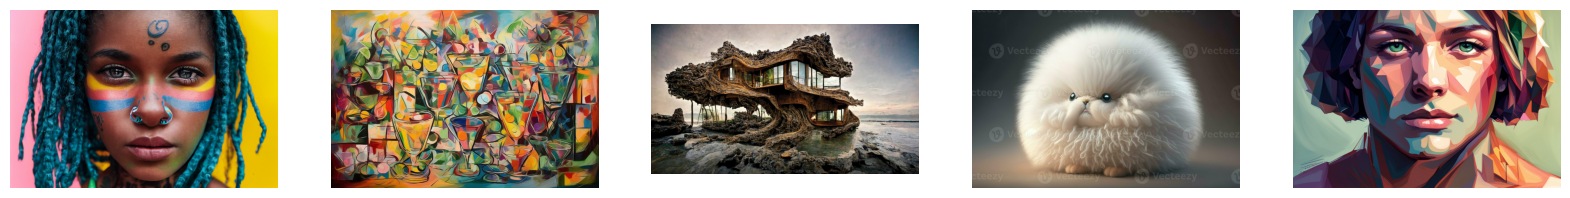

Class :  RealArt


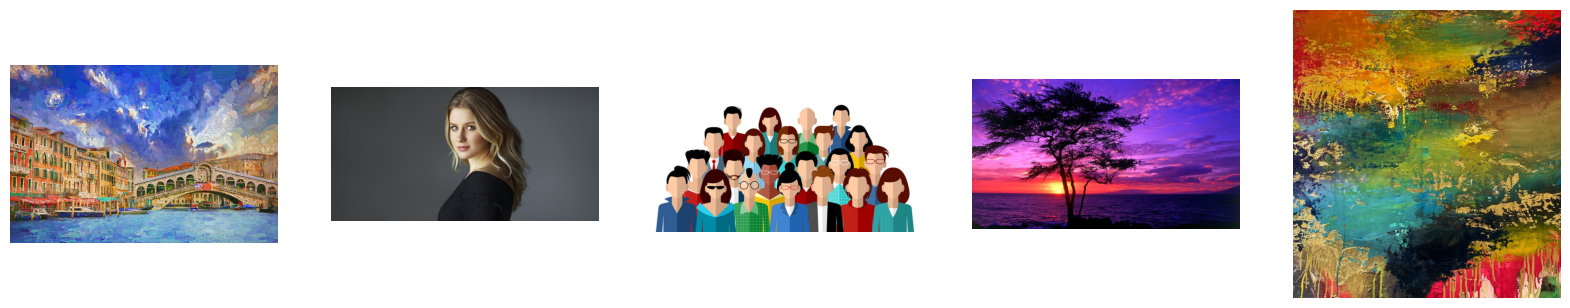

In [12]:
plot_images(val_dir)

### TEST

Class :  AiArtData


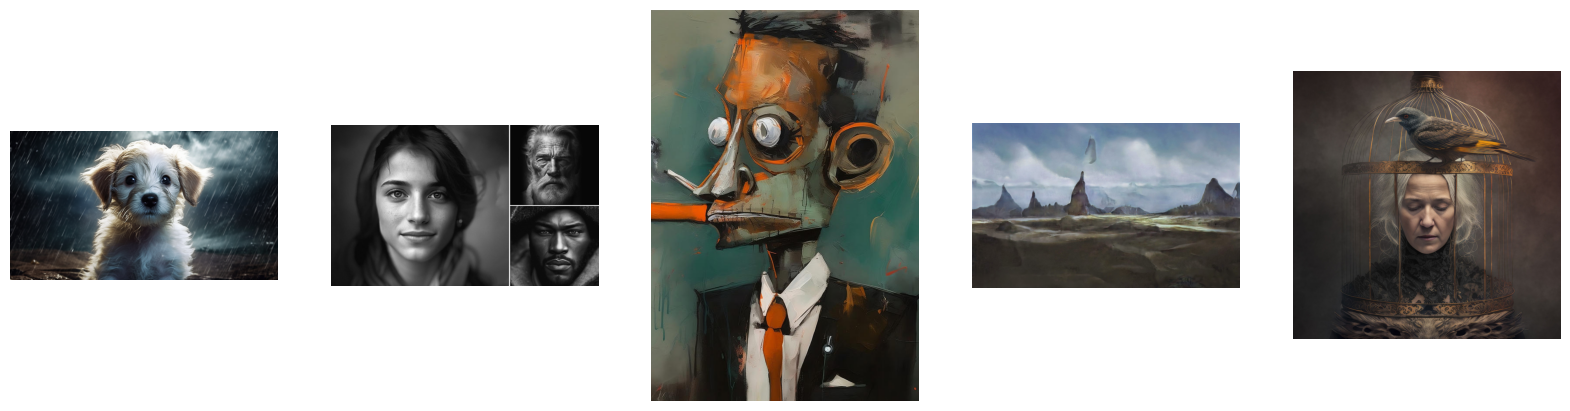

Class :  RealArt


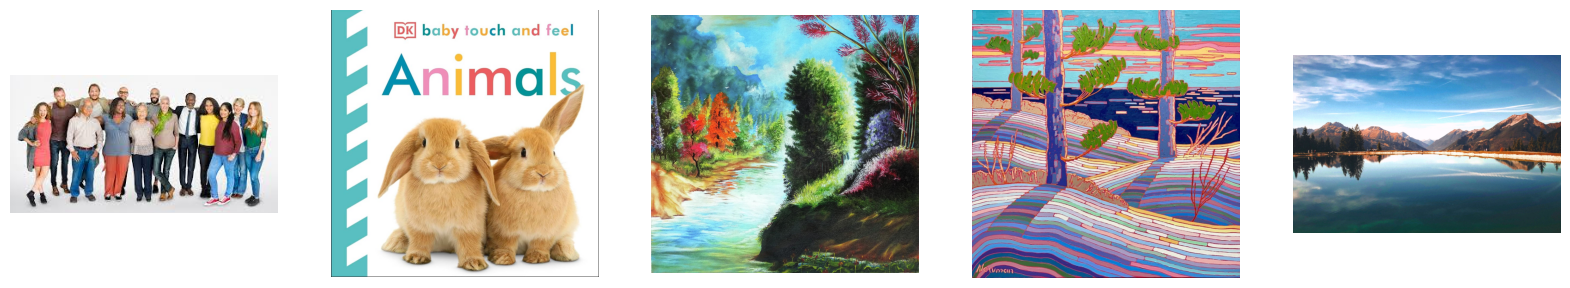

In [13]:
plot_images(test_dir)

# FEATURE ENGINEERING

## Dataset Splitting

```
The code is made into markdown because it has been run previously for splitting the train, val, and test datasets.
```

```python
# Make new directory for data splitting
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
```

```python
# Get all class directories
classes = os.listdir(base_dir)
```

```python
# Get all class directories
classes = os.listdir(base_dir)
```

```python
# Loop through each class and split images
for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    
    if os.path.isdir(class_path):
        # Get a list of image file paths
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        
        # Split into train and test (70% train, 20% test)
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
        
        # Further split 50% of the remaining images into validation (50% of the 30%)
        val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)
        
        # Create directories for the class in train, val, and test sets
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        
        # Move the files to the corresponding directories
        for img in train_images:
            shutil.move(img, os.path.join(train_dir, class_name, os.path.basename(img)))
        
        for img in val_images:
            shutil.move(img, os.path.join(val_dir, class_name, os.path.basename(img)))
        
        for img in test_images:
            shutil.move(img, os.path.join(test_dir, class_name, os.path.basename(img)))
```

```
After splitting the data into train test and validation, the data is then moved from the dataset folder to the train, val, and test directory according to the percentage of dataset splitting, which is 70% train, 15% val, 15% test. The dataset directory is now empty because all of its contents have moved.
```

## PREPROCESSING

```
Before performing model definition, the dataset is first preprocessed so that the data is uniform and simplifies the machine learning process.
```

In [14]:
img_height= 256
img_width= 256
batch_size= 16

In [38]:
# Create batch generator for train-set, val-set, and test-set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


```
Data Preprocessing steps :

- Data resized to 256 x 256 pixels
- Class mode set to binary (since there are only two target classes)
- Data will be trained in batch of 32
- R,G,B value rescaled from 0-255 to 0-1 by scaling with a 1/255
- Data shuffled
```

In [16]:
train_set.class_indices

{'AiArtData': 0, 'RealArt': 1}

```
index 0 indicates AI generated picture data
index 1 indicates real picture data
```

## PREPROCESSING WITH DATA AUGMENTATION

```
Data augmentation used in this project dataset to improve our dataset diversity and to reduce overfit in model.
```

In [9]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
val_set_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


```
Data Preprocessing with data augmentation steps :

- Data resized to 256 x 256 pixels
- Class mode set to binary (since there are only two target classes)
- Data will be trained in batch of 32
- R,G,B value rescaled from 0-255 to 0-1 by scaling with a 1/255
- Data shuffled
- Data augmentation :
    - rotation_range=30
        This parameter randomly rotates the image by an angle between -rotation_range and +rotation_range. In this case, the image will be randomly rotated between -30° and +30°.
    - width_shift_range=0.15
        This parameter randomly shifts the image horizontally by a fraction of the image width. The value 0.15 means the image will be shifted horizontally by a random amount up to 15% of the total width.
    - height_shift_range=0.15
        This parameter randomly shifts the image vertically by a fraction of the image height. The value 0.15 means the image will be shifted vertically by a random amount up to 15% of the total height.
    - brightness_range=[0.8, 1.2]
        This parameter randomly adjusts the brightness of the image. The value 0.8 means that the image can be darkened by up to 20%, and 1.2 means it can be brightened by up to 20%. The brightness is adjusted randomly within this range.
    - zoom_range=0.15
        This parameter zooms in or out on the image randomly. The value 0.15 means that the image can be zoomed in or out by up to 15%.
    - shear_range=0.15
        This parameter applies random shear transformations to the image, which distorts the image by shearing it along one axis. The value 0.15 specifies a shear angle of up to 15°.
    - horizontal_flip=True
        This parameter randomly flips the image horizontally (left to right).
    - vertical_flip=True
        This parameter randomly flips the image vertically (top to bottom). This is useful if your images might appear in both orientations.
    - fill_mode='nearest'
        This parameter defines how to fill the newly created pixels after applying transformations such as rotation, width/height shift, or zoom. 'nearest' means that the new pixels will be filled with the nearest pixel value from the original image.
    - channel_shift_range=20.0
        This parameter randomly shifts the values of the color channels (Red, Green, and Blue) by up to 20.0 units.
```

# ANN MODEL DEFINITON AND TRAINING

```
In this stage we define the model to be created and evaluate the results of the model. The evaluation results will then be used to improve the model in the future.
```

## WITHOUT DATA AUGMENTATION

```
We first tried the model with the preprocessed dataset without data augmentation.
```

In [18]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

```
We defined our base model with :
256 x 256 x 3 conv2d input layer
128 x 128 x 3 first hidden layer
MaxPooled
64 x 64 x 3 second hidden layer
Maxpooled
Flattened
Dropout 50%
32 Dense layer
2 output layer
```

In [19]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set, epochs=40, validation_data=val_set, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dropout (Dropout)           (None, 262144)            0

2025-01-06 21:46:52.904489: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-01-06 21:46:52.904510: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-06 21:46:52.904517: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-06 21:46:52.904540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-06 21:46:52.904551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/40


2025-01-06 21:46:53.358438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


17/49 [=========>....................] - ETA: 4s - loss: 1.6949 - accuracy: 0.5331

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 10s 188ms/step - loss: 1.0443 - accuracy: 0.5394 - val_loss: 0.6910 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 9s 172ms/step - loss: 0.6970 - accuracy: 0.5432 - val_loss: 0.6901 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 8s 170ms/step - loss: 0.6894 - accuracy: 0.5523 - val_loss: 0.6890 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 8s 170ms/step - loss: 0.6889 - accuracy: 0.5523 - val_loss: 0.6888 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 9s 171ms/step - loss: 0.6885 - accuracy: 0.5523 - val_loss: 0.6885 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 9s 178ms/step - loss: 0.6884 - accuracy: 0.5523 - val_loss: 0.6883 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 9s 177ms/step - loss: 0.6877 - accuracy: 0.5510 - val_loss: 0.6881 - val_accuracy: 0.5510
Epoch 8/40
49/49

```
As seen from the model accuracy and validation accuracy, the model is overfitting significantly by the end of the epoch.

Train accuracy : 0.9665
Validation accuracy : 0.6327
```

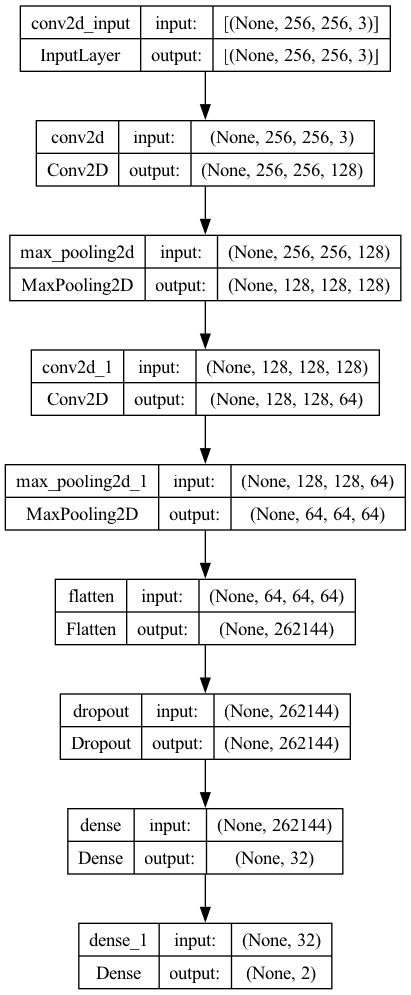

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

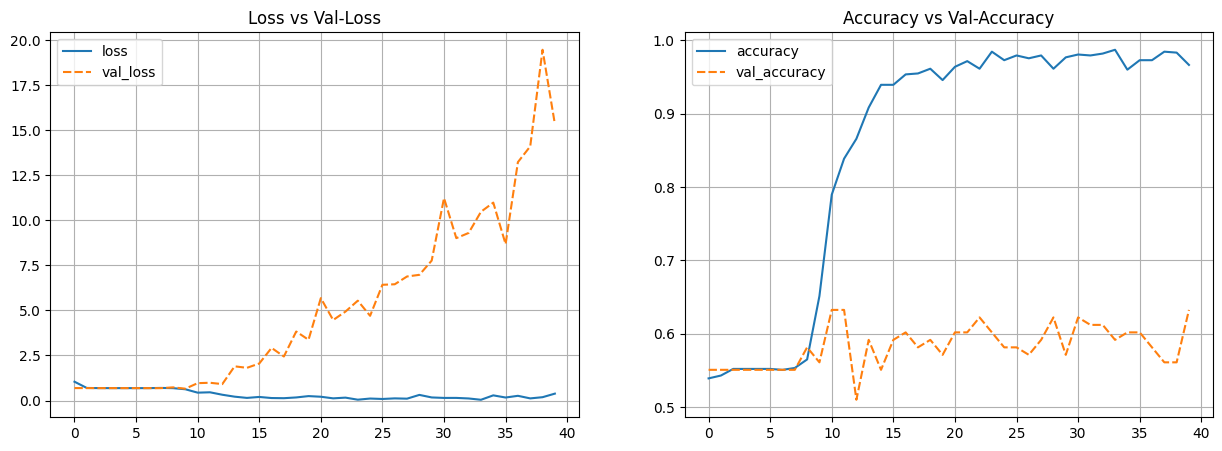

In [21]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
As seen from the graph, the training accuracy continues to increase, while the validation accuracy remains around 0.5. In this case, the model tends to memorize the training dataset rather than generalizing to new data."
```

## WITH DATA AUGMENTATION

```
To reduce the overfitting problem in our model, we use data augmentation in preprocessing step and train the same model using data augmented dataset.
```

In [22]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

```
Same base model
```

In [23]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dropout (Dropout)           (None, 262144)            0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 13s 255ms/step - loss: 1.3638 - accuracy: 0.5381 - val_loss: 0.6913 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 12s 245ms/step - loss: 0.6859 - accuracy: 0.5523 - val_loss: 0.6899 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 12s 241ms/step - loss: 0.6899 - accuracy: 0.5523 - val_loss: 0.6818 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 12s 241ms/step - loss: 0.7105 - accuracy: 0.5523 - val_loss: 0.6713 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 12s 244ms/step - loss: 0.6861 - accuracy: 0.5510 - val_loss: 0.6870 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 12s 251ms/step - loss: 0.6895 - accuracy: 0.5510 - val_loss: 0.6829 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 12s 248ms/step - loss: 0.6861 - accuracy: 0.5716 - val_loss: 0.6812 - val_accuracy: 0.5510
Epoch 8/40

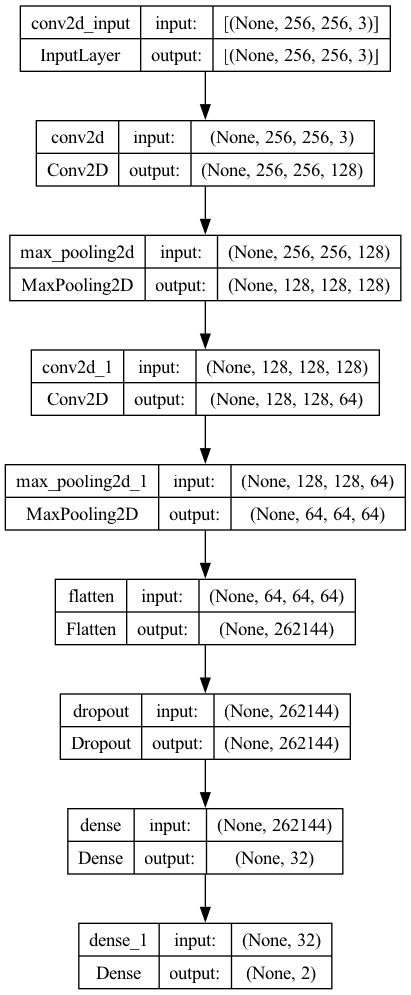

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

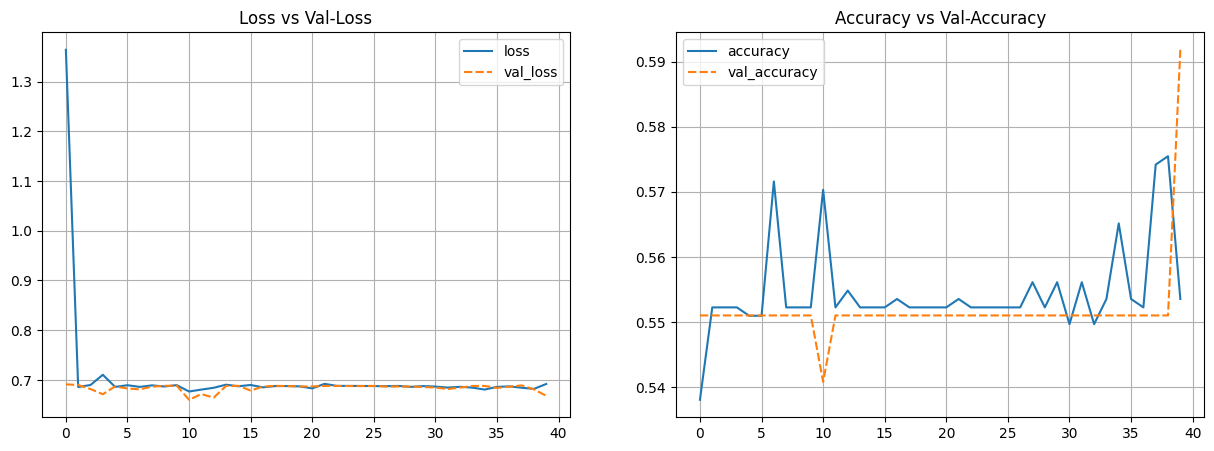

In [25]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
This will be our benchmark from now on because model result after data augmentation is significantly better and not overfitting anymore but this model seem like not learning at all, so we will improve the model to increase the accuracy.

Train accuracy : 0.5535
Vaidation accuracy : 0.5918
```

# ANN IMPROVEMENT

```
We already know that using a dataset with data augmentation is better for the model, so we will improve our model by applying data augmentation to the dataset
```

## TEST IMAGE SIZE

```
First, we want to determine if image resolution affects the model's performance.

To do this, we will test the following image sizes:

decrease the resolution: 128 x 128 pixels
increase the resolution: 512 x 512 pixels

We will compare the base model's performance compared to both resolutions."
```

### 128 x 128 pixels

In [29]:
img_height= 128
img_width= 128
batch_size= 16

In [30]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
val_set_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


In [31]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [32]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 184ms/step - loss: 0.9934 - accuracy: 0.5342 - val_loss: 0.6929 - val_accuracy: 0.5408
Epoch 2/40
49/49 [==============================] - 9s 187ms/step - loss: 0.6906 - accuracy: 0.5497 - val_loss: 0.6846 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6902 - accuracy: 0.5497 - val_loss: 0.6847 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 8s 171ms/step - loss: 0.6848 - accuracy: 0.5510 - val_loss: 0.6595 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 8s 172ms/step - loss: 0.6830 - accuracy: 0.5548 - val_loss: 0.6620 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 8s 167ms/step - loss: 0.6683 - accuracy: 0.5910 - val_loss: 0.6666 - val_accuracy: 0.5612
Epoch 7/40
49/49 [==============================] - 8s 171ms/step - loss: 0.6709 - accuracy: 0.5794 - val_loss: 0.6741 - val_accuracy: 0.5816
Epoch 8/40
49/49 

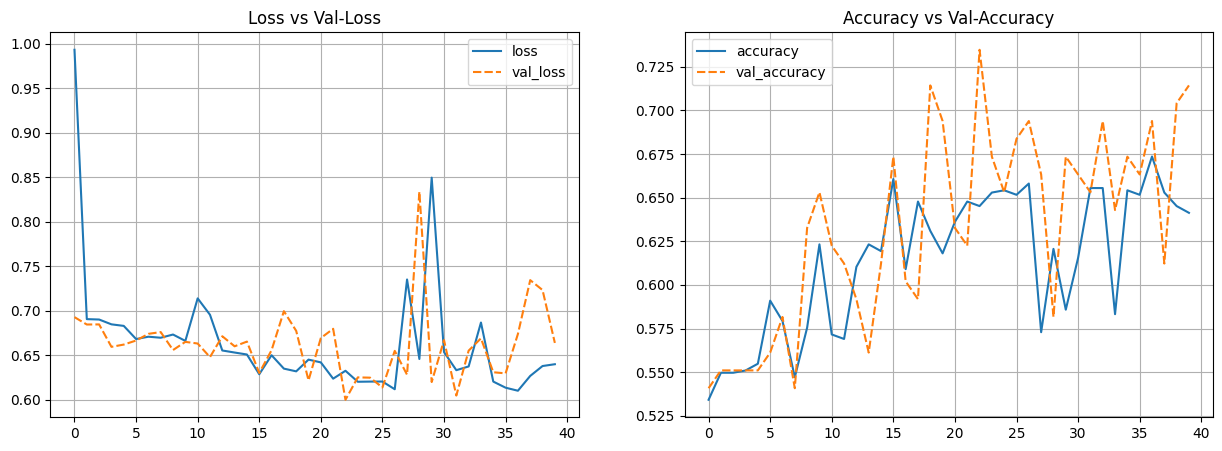

In [33]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
From the model evalutaion we can see that using image size 128x128 pixels have better accuracy compared to original 256 x 256 pixels

Original 256 x 256 pixels
Train accuracy : 0.5535
Vaidation accuracy : 0.5918

128 x 128 pixels
Train accuracy: 0.6413
Vaidation accuracy : 0.7143
```

### 512 x 512 pixels

In [34]:
img_height= 512
img_width= 512
batch_size= 16

In [35]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
val_set_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


In [36]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dropout (Dropout)           (None, 1048576)           0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 41s 799ms/step - loss: 2.2482 - accuracy: 0.5290 - val_loss: 0.6928 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 39s 786ms/step - loss: 0.6949 - accuracy: 0.5471 - val_loss: 0.6858 - val_accuracy: 0.5714
Epoch 3/40
49/49 [==============================] - 39s 784ms/step - loss: 0.6916 - accuracy: 0.5471 - val_loss: 0.6876 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 38s 773ms/step - loss: 0.6864 - accuracy: 0.5523 - val_loss: 0.6864 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 39s 784ms/step - loss: 0.6886 - accuracy: 0.5523 - val_loss: 0.6871 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 38s 775ms/step - loss: 0.7336 - accuracy: 0.5510 - val_loss: 0.6885 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 38s 778ms/step - loss: 0.6883 - accuracy: 0.5523 - val_loss: 0.6881 - val_accuracy: 0.5510
Epoch 8/40

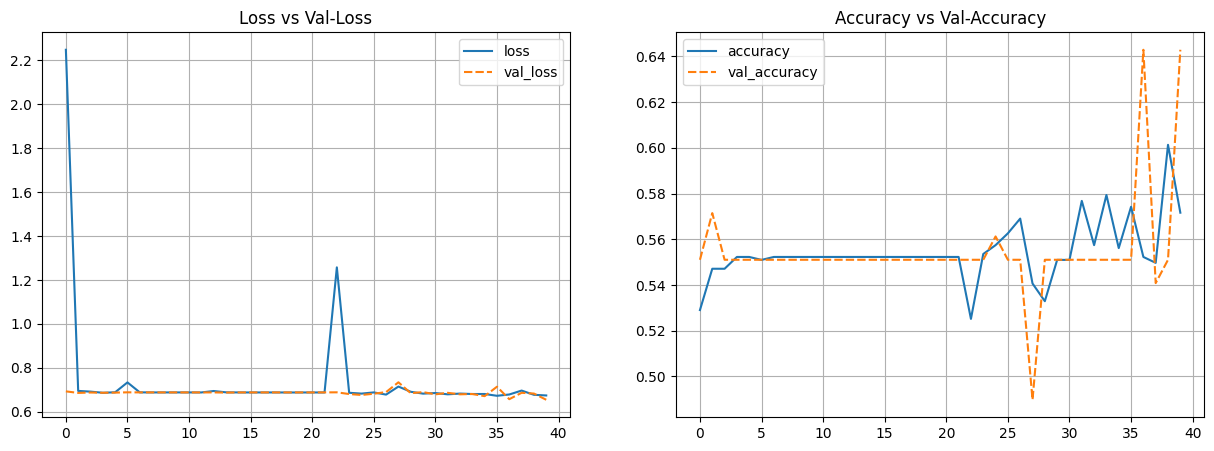

In [38]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
From the model evaluation, we can see that using an image size of 512x512 pixels results in worse accuracy compared to the original 256x256 pixels. It also has a significantly longer training time.

Original 256 x 256 pixels
Train accuracy: 0.5535
Validation accuracy: 0.5918

512 x 512 pixels
Train accuracy: 0.5716
Validation accuracy: 0.6429
```

## TEST BATCH SIZE

```
We know that using 128 x 128 pixel images is better. Now, we want to test if the batch size will affect the model's performance.
```

```
Test batch size
decrease the batch to 8
increase the batch to 32
```

### BATCH OF 8

In [39]:
img_height= 128
img_width= 128
batch_size= 8

In [40]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
val_set_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


In [41]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [42]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 [==============================] - 10s 93ms/step - loss: 0.7684 - accuracy: 0.5213 - val_loss: 0.6909 - val_accuracy: 0.5510
Epoch 2/40
97/97 [==============================] - 9s 90ms/step - loss: 0.6902 - accuracy: 0.5523 - val_loss: 0.6895 - val_accuracy: 0.5510
Epoch 3/40
97/97 [==============================] - 9s 89ms/step - loss: 0.6911 - accuracy: 0.5523 - val_loss: 0.6852 - val_accuracy: 0.5510
Epoch 4/40
97/97 [==============================] - 9s 89ms/step - loss: 0.6867 - accuracy: 0.5458 - val_loss: 0.6752 - val_accuracy: 0.5408
Epoch 5/40
97/97 [==============================] - 9s 89ms/step - loss: 0.7995 - accuracy: 0.5535 - val_loss: 0.7324 - val_accuracy: 0.5102
Epoch 6/40
97/97 [==============================] - 9s 89ms/step - loss: 0.7013 - accuracy: 0.5445 - val_loss: 0.6875 - val_accuracy: 0.5510
Epoch 7/40
97/97 [==============================] - 9s 89ms/step - loss: 0.6903 - accuracy: 0.5510 - val_loss: 0.6882 - val_accuracy: 0.5510
Epoch 8/40
97/97 [=====

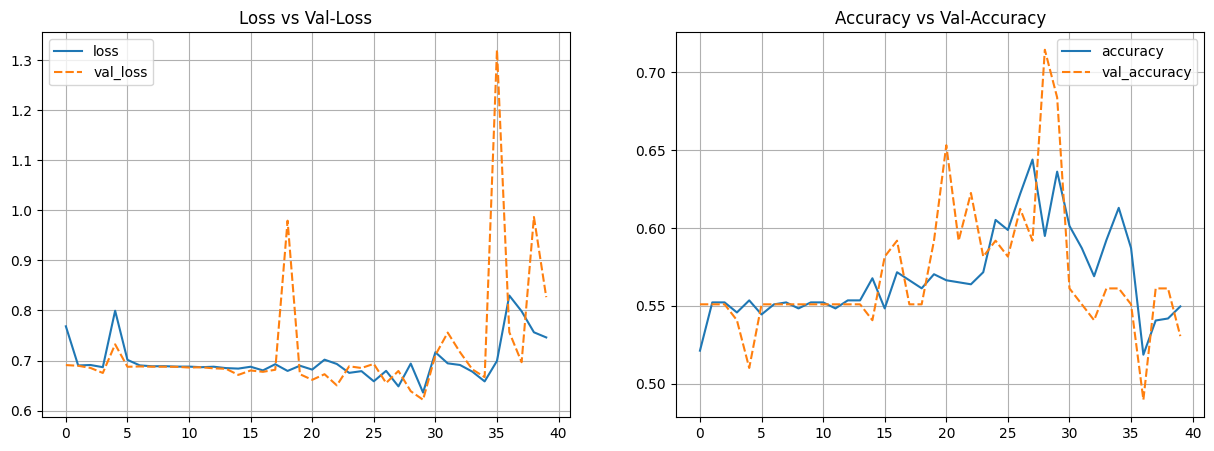

In [43]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
The model result accuracy worst compared to batch of 16
```

### BATCH OF 32

In [44]:
img_height= 128
img_width= 128
batch_size= 32

In [45]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
val_set_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


In [46]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [47]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 [==============================] - 9s 357ms/step - loss: 1.6166 - accuracy: 0.5419 - val_loss: 0.6943 - val_accuracy: 0.4490
Epoch 2/40
25/25 [==============================] - 9s 340ms/step - loss: 0.6941 - accuracy: 0.4490 - val_loss: 0.6939 - val_accuracy: 0.4490
Epoch 3/40
25/25 [==============================] - 9s 341ms/step - loss: 0.6936 - accuracy: 0.4594 - val_loss: 0.6931 - val_accuracy: 0.5510
Epoch 4/40
25/25 [==============================] - 9s 343ms/step - loss: 0.6928 - accuracy: 0.5510 - val_loss: 0.6923 - val_accuracy: 0.5510
Epoch 5/40
25/25 [==============================] - 9s 343ms/step - loss: 0.6921 - accuracy: 0.5523 - val_loss: 0.6916 - val_accuracy: 0.5510
Epoch 6/40
25/25 [==============================] - 9s 336ms/step - loss: 0.6938 - accuracy: 0.5523 - val_loss: 0.6872 - val_accuracy: 0.5510
Epoch 7/40
25/25 [==============================] - 9s 340ms/step - loss: 0.6940 - accuracy: 0.5510 - val_loss: 0.6912 - val_accuracy: 0.5510
Epoch 8/40
25/25 

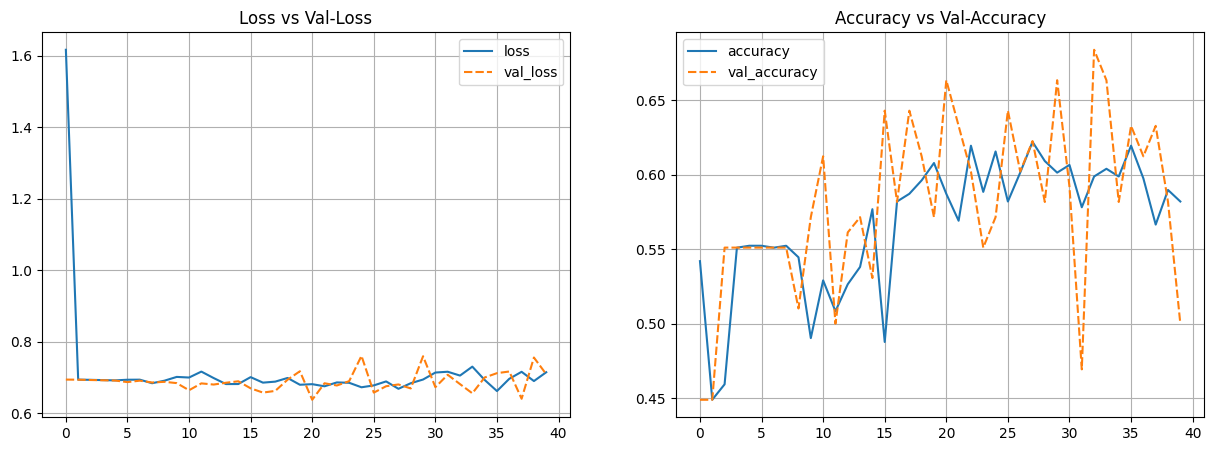

In [48]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
The model result accuracy worst compared to batch of 16
```

## TEST OPTIMIZER

```
We know that using 128 x 128 pixel images and a batch size of 16 is better. Now, we want to test if changing the model's optimizer will affect its performance.
```

```
Test model optimizer
Nadam
SGD
SGD with Momentum
image size 128x128 pixels
batch size 16
```

In [21]:
img_height= 128
img_width= 128
batch_size= 16

In [23]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
train_set_aug = train_datagen_aug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
val_set_aug = val_datagen_aug.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, brightness_range=[0.8,1.2], zoom_range=0.15, shear_range=0.15, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', channel_shift_range=20.0)
test_set_aug = test_datagen_aug.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 775 images belonging to 2 classes.


Found 98 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


### NADAM

In [51]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [52]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 10s 189ms/step - loss: 0.7599 - accuracy: 0.5368 - val_loss: 0.6884 - val_accuracy: 0.5612
Epoch 2/40
49/49 [==============================] - 9s 182ms/step - loss: 0.6979 - accuracy: 0.5587 - val_loss: 0.6728 - val_accuracy: 0.5612
Epoch 3/40
49/49 [==============================] - 9s 178ms/step - loss: 0.7204 - accuracy: 0.5510 - val_loss: 0.6801 - val_accuracy: 0.6122
Epoch 4/40
49/49 [==============================] - 9s 191ms/step - loss: 0.6822 - accuracy: 0.5897 - val_loss: 0.6381 - val_accuracy: 0.5918
Epoch 5/40
49/49 [==============================] - 9s 189ms/step - loss: 0.6753 - accuracy: 0.5987 - val_loss: 0.6525 - val_accuracy: 0.6122
Epoch 6/40
49/49 [==============================] - 9s 184ms/step - loss: 0.9545 - accuracy: 0.5471 - val_loss: 0.6845 - val_accuracy: 0.5816
Epoch 7/40
49/49 [==============================] - 9s 188ms/step - loss: 0.9222 - accuracy: 0.5277 - val_loss: 0.7444 - val_accuracy: 0.5306
Epoch 8/40
49/49

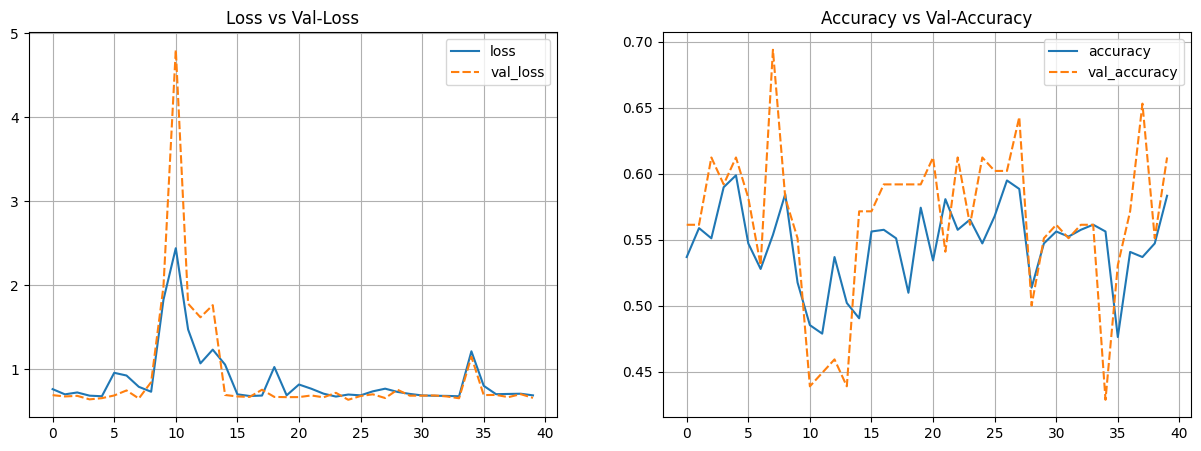

In [53]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### SGD

In [64]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [65]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 189ms/step - loss: 0.7250 - accuracy: 0.5058 - val_loss: 0.6888 - val_accuracy: 0.5306
Epoch 2/40
49/49 [==============================] - 9s 190ms/step - loss: 0.7047 - accuracy: 0.4942 - val_loss: 0.6929 - val_accuracy: 0.5204
Epoch 3/40
49/49 [==============================] - 9s 189ms/step - loss: 0.6914 - accuracy: 0.5381 - val_loss: 0.6949 - val_accuracy: 0.4796
Epoch 4/40
49/49 [==============================] - 9s 177ms/step - loss: 0.7058 - accuracy: 0.4994 - val_loss: 0.6897 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6876 - accuracy: 0.5523 - val_loss: 0.6795 - val_accuracy: 0.5918
Epoch 6/40
49/49 [==============================] - 9s 176ms/step - loss: 0.6844 - accuracy: 0.5729 - val_loss: 0.6822 - val_accuracy: 0.5612
Epoch 7/40
49/49 [==============================] - 9s 173ms/step - loss: 0.6843 - accuracy: 0.5535 - val_loss: 0.6789 - val_accuracy: 0.5408
Epoch 8/40
49/49 

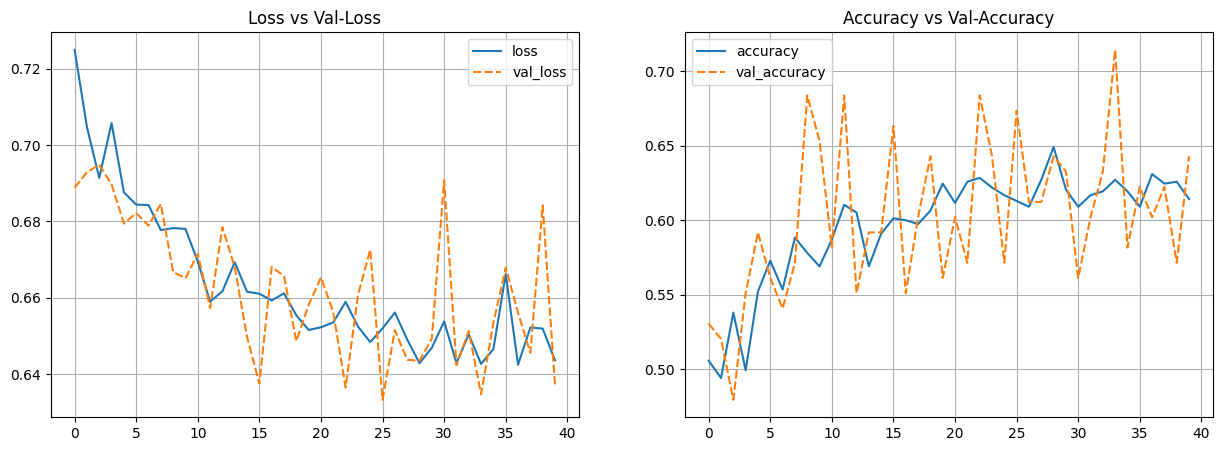

In [66]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### SGD WITH MOMENTUM

In [67]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [68]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

2025-01-06 23:11:59.910166: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


12/49 [======>.......................] - ETA: 5s - loss: 0.7593 - accuracy: 0.4635

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 180ms/step - loss: 0.7080 - accuracy: 0.5006 - val_loss: 0.6848 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 9s 178ms/step - loss: 0.6895 - accuracy: 0.5445 - val_loss: 0.6844 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 9s 176ms/step - loss: 0.6935 - accuracy: 0.5535 - val_loss: 0.6784 - val_accuracy: 0.5816
Epoch 4/40
49/49 [==============================] - 9s 176ms/step - loss: 0.6768 - accuracy: 0.5600 - val_loss: 0.6718 - val_accuracy: 0.6224
Epoch 5/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6639 - accuracy: 0.6026 - val_loss: 0.6737 - val_accuracy: 0.6633
Epoch 6/40
49/49 [==============================] - 9s 176ms/step - loss: 0.6744 - accuracy: 0.5742 - val_loss: 0.6418 - val_accuracy: 0.6327
Epoch 7/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6655 - accuracy: 0.6039 - val_loss: 0.6497 - val_accuracy: 0.6531
Epoch 8/40
49/49 

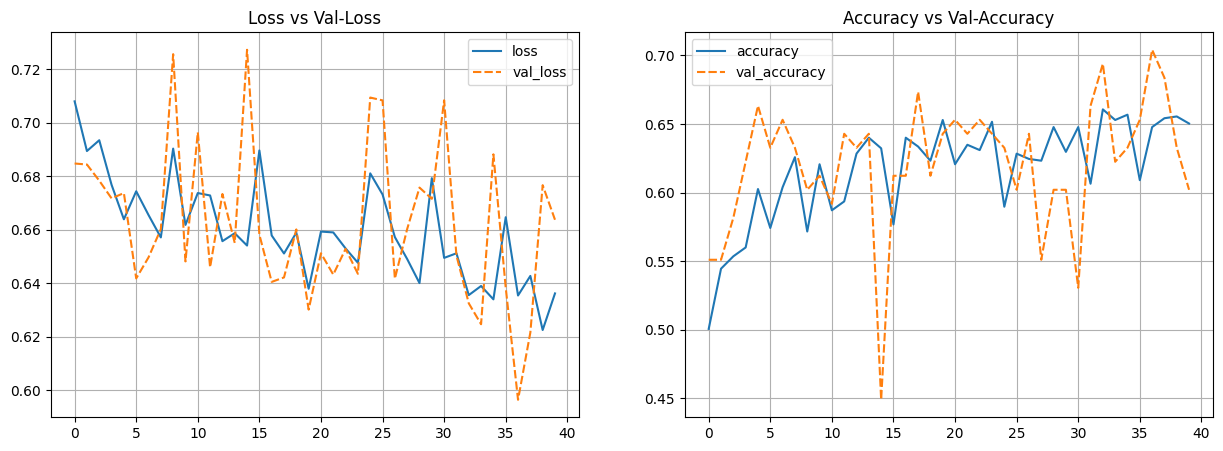

In [69]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
SGD with momentum delivered the best result out of all optimizer that we tested and compared to base model optimizer (adam).

So we will continue model tuning using SGD with momentum optimnizer.
```

## TEST LEARNING RATE

```
Test learning rate
0.1
0.05
0.005
SGD with Momentum
Image size 128 x 128 pixels
Batch size 16
```

### LEARNING RATE 0.1

In [70]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [71]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
learning_rate = 0.1
momentum=0.9
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

2025-01-06 23:23:23.458537: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


40/49 [=======================>......] - ETA: 1s - loss: 6446.7510 - accuracy: 0.4913

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 10s 193ms/step - loss: 41338.0742 - accuracy: 0.4890 - val_loss: 125329.3125 - val_accuracy: 0.4490
Epoch 2/40
49/49 [==============================] - 9s 186ms/step - loss: 192224.6406 - accuracy: 0.5045 - val_loss: 221849.7812 - val_accuracy: 0.4490
Epoch 3/40
49/49 [==============================] - 9s 179ms/step - loss: 323810.5938 - accuracy: 0.5187 - val_loss: 350932.8125 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 9s 179ms/step - loss: 302404.3438 - accuracy: 0.5123 - val_loss: 451088.5312 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 9s 182ms/step - loss: 235122.7656 - accuracy: 0.5148 - val_loss: 145712.3438 - val_accuracy: 0.4490
Epoch 6/40
49/49 [==============================] - 9s 188ms/step - loss: 428083.5000 - accuracy: 0.5006 - val_loss: 291477.8750 - val_accuracy: 0.4490
Epoch 7/40
49/49 [==============================] - 9s 188ms/step - loss: 547118.7500 - accuracy: 0

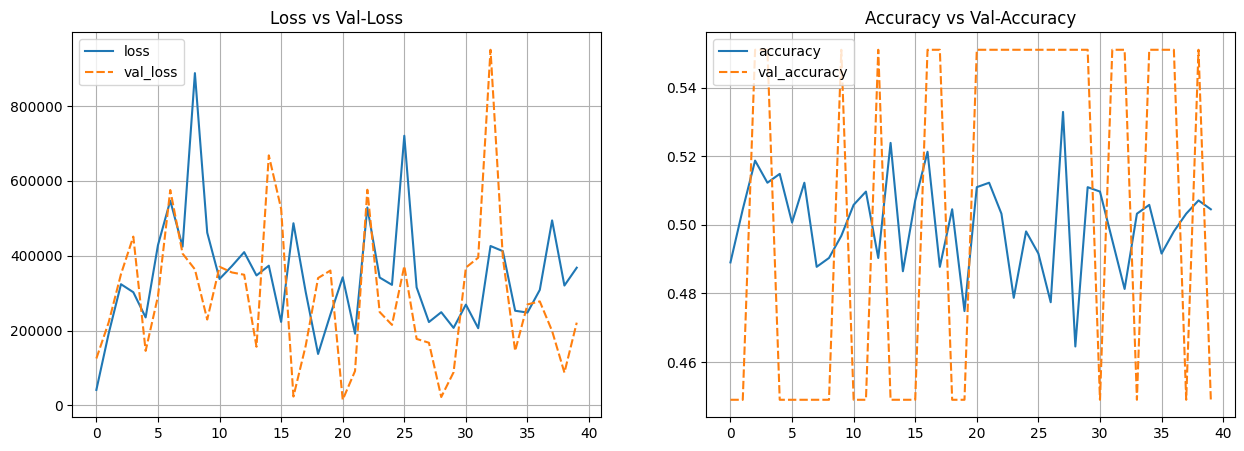

In [72]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### LEARNING RATE 0.05

In [73]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [74]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
learning_rate = 0.05
momentum=0.9
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

2025-01-06 23:29:20.351237: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


 8/49 [===>..........................] - ETA: 6s - loss: 0.9726 - accuracy: 0.5938

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 182ms/step - loss: 1.7614 - accuracy: 0.5394 - val_loss: 2.5334 - val_accuracy: 0.4490
Epoch 2/40
49/49 [==============================] - 9s 174ms/step - loss: 9.0645 - accuracy: 0.4877 - val_loss: 5.2676 - val_accuracy: 0.4490
Epoch 3/40
49/49 [==============================] - 9s 173ms/step - loss: 5.6179 - accuracy: 0.5213 - val_loss: 21.3116 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 9s 177ms/step - loss: 32.2427 - accuracy: 0.5071 - val_loss: 35.0368 - val_accuracy: 0.4490
Epoch 5/40
49/49 [==============================] - 9s 175ms/step - loss: 19.6559 - accuracy: 0.5174 - val_loss: 5.4064 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 9s 178ms/step - loss: 10.3057 - accuracy: 0.4929 - val_loss: 7.7923 - val_accuracy: 0.4490
Epoch 7/40
49/49 [==============================] - 9s 187ms/step - loss: 12.6343 - accuracy: 0.5252 - val_loss: 2.4040 - val_accuracy: 0.4592
Epoch 8/40


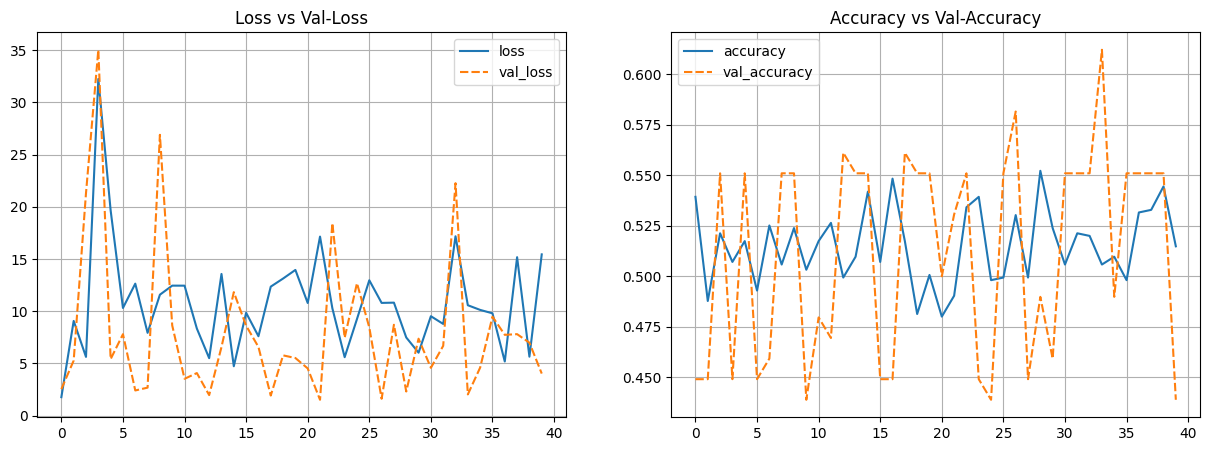

In [75]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### LEARNING RATE 0.005

In [76]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [77]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
learning_rate = 0.005
momentum=0.9
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dropout (Dropout)           (None, 65536)             0

2025-01-06 23:35:26.326382: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


43/49 [=========================>....] - ETA: 0s - loss: 0.7101 - accuracy: 0.5272

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 186ms/step - loss: 0.7077 - accuracy: 0.5342 - val_loss: 0.6874 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6816 - accuracy: 0.5561 - val_loss: 0.6811 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6749 - accuracy: 0.5845 - val_loss: 0.6794 - val_accuracy: 0.6122
Epoch 4/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6741 - accuracy: 0.5781 - val_loss: 0.6619 - val_accuracy: 0.6429
Epoch 5/40
49/49 [==============================] - 8s 170ms/step - loss: 0.6655 - accuracy: 0.6065 - val_loss: 0.6552 - val_accuracy: 0.6633
Epoch 6/40
49/49 [==============================] - 8s 169ms/step - loss: 0.6614 - accuracy: 0.6090 - val_loss: 0.6795 - val_accuracy: 0.6020
Epoch 7/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6748 - accuracy: 0.5832 - val_loss: 0.6500 - val_accuracy: 0.6327
Epoch 8/40
49/49 

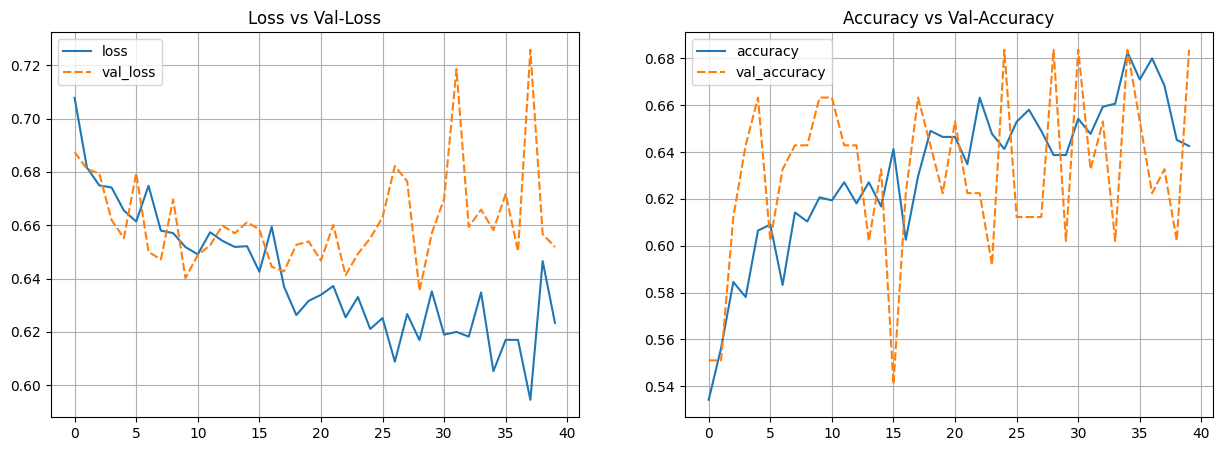

In [78]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

## TEST HIDDEN LAYER

```
Test hidden layer
1 hidden layer
3 hidden layer
SGD with Momentum
Image size 128 x 128 pixels
Batch size 16
Default learning rate
```

### 1 HIDDEN LAYER

In [79]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [80]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(64, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dropout (Dropout)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 32)                8388640   
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

2025-01-06 23:45:28.968714: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


14/49 [=======>......................] - ETA: 5s - loss: 2.5444 - accuracy: 0.4837

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 185ms/step - loss: 1.2014 - accuracy: 0.5406 - val_loss: 0.6902 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 9s 175ms/step - loss: 0.6969 - accuracy: 0.5174 - val_loss: 0.6895 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 9s 176ms/step - loss: 0.6892 - accuracy: 0.5523 - val_loss: 0.6823 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 9s 174ms/step - loss: 0.6826 - accuracy: 0.5613 - val_loss: 0.6688 - val_accuracy: 0.6531
Epoch 5/40
49/49 [==============================] - 9s 169ms/step - loss: 0.6746 - accuracy: 0.5794 - val_loss: 0.6557 - val_accuracy: 0.6020
Epoch 6/40
49/49 [==============================] - 9s 174ms/step - loss: 0.6717 - accuracy: 0.6129 - val_loss: 0.6307 - val_accuracy: 0.6224
Epoch 7/40
49/49 [==============================] - 9s 174ms/step - loss: 0.6722 - accuracy: 0.6013 - val_loss: 0.6565 - val_accuracy: 0.6327
Epoch 8/40
49/49 

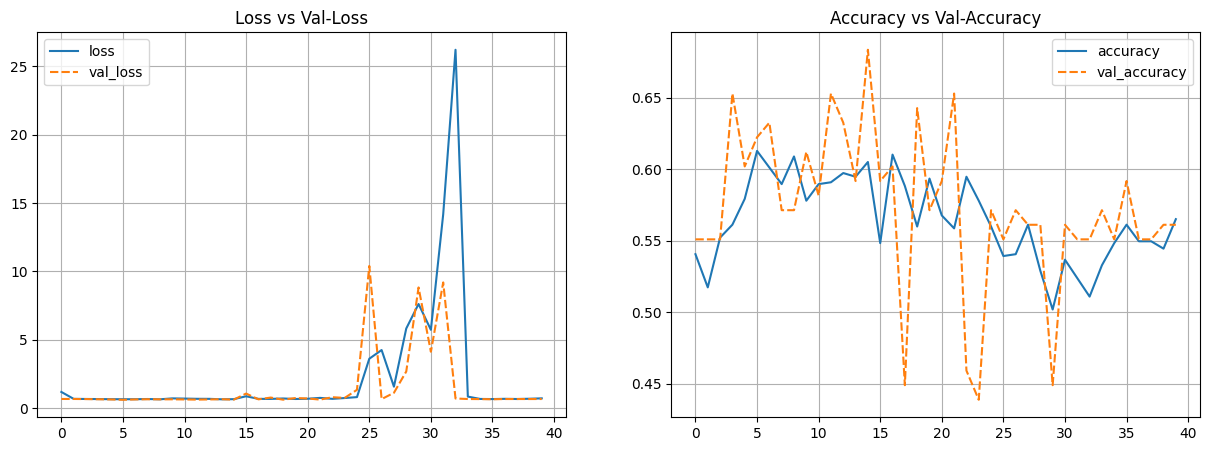

In [81]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### 3 HIDDEN LAYER

In [82]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [83]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(256, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2025-01-06 23:51:18.821942: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


49/49 [==============================] - 9s 185ms/step - loss: 0.6971 - accuracy: 0.5148 - val_loss: 0.6888 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 9s 179ms/step - loss: 0.6871 - accuracy: 0.5574 - val_loss: 0.6809 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 9s 189ms/step - loss: 0.6776 - accuracy: 0.5832 - val_loss: 0.6764 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 9s 179ms/step - loss: 0.6724 - accuracy: 0.5832 - val_loss: 0.6808 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 9s 181ms/step - loss: 0.6740 - accuracy: 0.5768 - val_loss: 0.6463 - val_accuracy: 0.6939
Epoch 6/40
49/49 [==============================] - 9s 180ms/step - loss: 0.6814 - accuracy: 0.5819 - val_loss: 0.6767 - val_accuracy: 0.5816
Epoch 7/40
49/49 [==============================] - 9s 182ms/step - loss: 0.6787 - accuracy: 0.5677 - val_loss: 0.6677 - val_accuracy: 0.6224
Epoch 8/40
49/49 

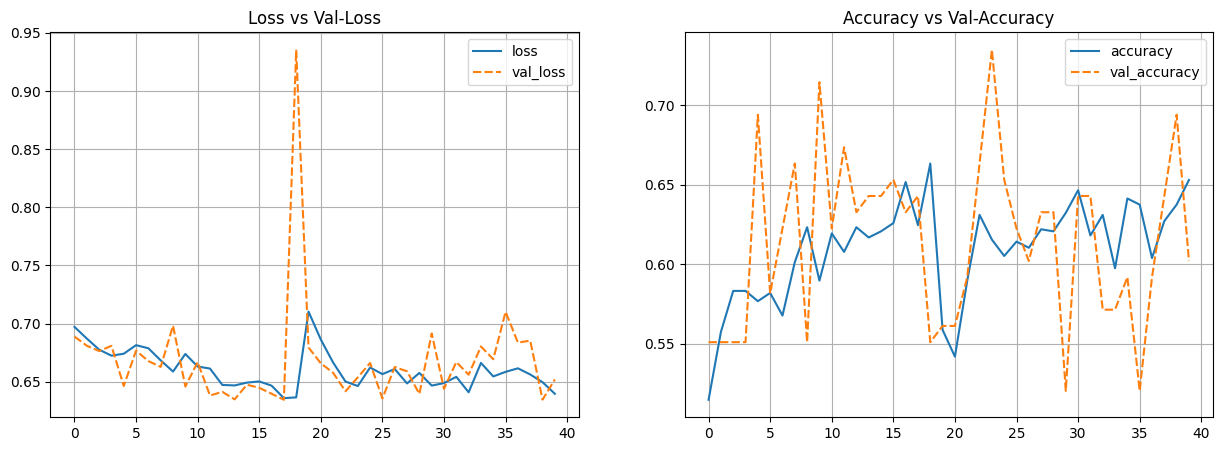

In [84]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### 3 HIDDEN LAYER BUT SMALLER MODEL

In [85]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [86]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(24, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(12, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(8, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 12)        2604      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         872       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

2025-01-06 23:57:27.910611: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


16/49 [========>.....................] - ETA: 4s - loss: 0.6983 - accuracy: 0.5156

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 10s 182ms/step - loss: 0.6915 - accuracy: 0.5406 - val_loss: 0.6865 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 9s 174ms/step - loss: 0.6891 - accuracy: 0.5523 - val_loss: 0.6877 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6892 - accuracy: 0.5342 - val_loss: 0.6872 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 9s 170ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6830 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6861 - accuracy: 0.5535 - val_loss: 0.6847 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6889 - accuracy: 0.5523 - val_loss: 0.6853 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6858 - accuracy: 0.5510 - val_loss: 0.6794 - val_accuracy: 0.5510
Epoch 8/40
49/49

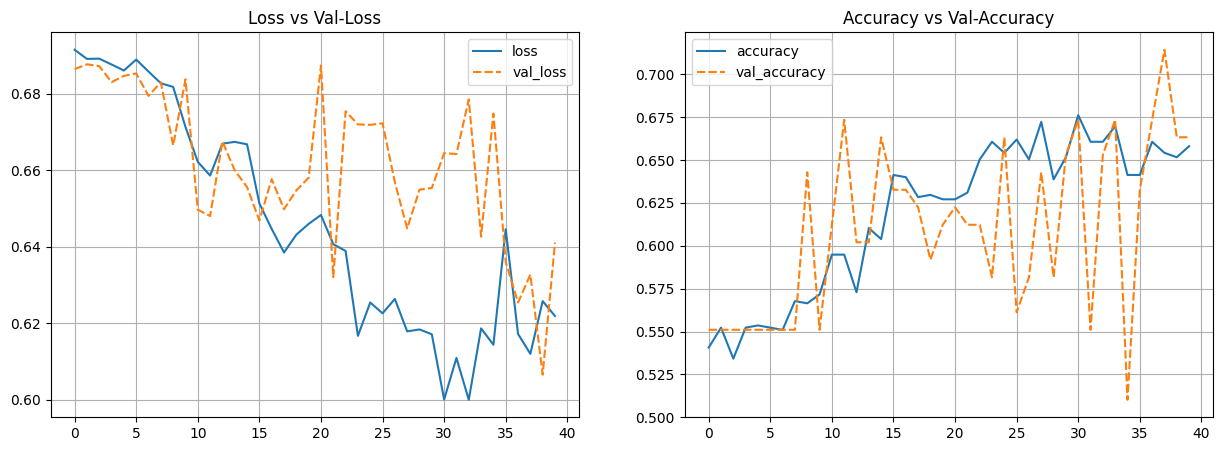

In [87]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

## TEST DENSE LAYER

```
Test dense layer
2 dense layer
3 dense layer
SGD with Momentum
Image size 128 x 128 pixels
Batch size 16
Default learning rate
3 hidden layer (24, 12, 8)
```

### TEST 2 DENSE LAYER

In [88]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [89]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(24, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(12, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(8, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 12)        2604      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         872       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

2025-01-07 00:05:29.603425: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


28/49 [================>.............] - ETA: 3s - loss: 0.7530 - accuracy: 0.5335

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 181ms/step - loss: 0.7398 - accuracy: 0.5058 - val_loss: 0.7140 - val_accuracy: 0.3980
Epoch 2/40
49/49 [==============================] - 9s 185ms/step - loss: 0.7121 - accuracy: 0.5161 - val_loss: 0.7047 - val_accuracy: 0.5408
Epoch 3/40
49/49 [==============================] - 9s 174ms/step - loss: 0.7030 - accuracy: 0.4852 - val_loss: 0.6923 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 8s 175ms/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6913 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 8s 173ms/step - loss: 0.6883 - accuracy: 0.5639 - val_loss: 0.6932 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 8s 173ms/step - loss: 0.6886 - accuracy: 0.5419 - val_loss: 0.6833 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 8s 173ms/step - loss: 0.6801 - accuracy: 0.5742 - val_loss: 0.6873 - val_accuracy: 0.5510
Epoch 8/40
49/49 

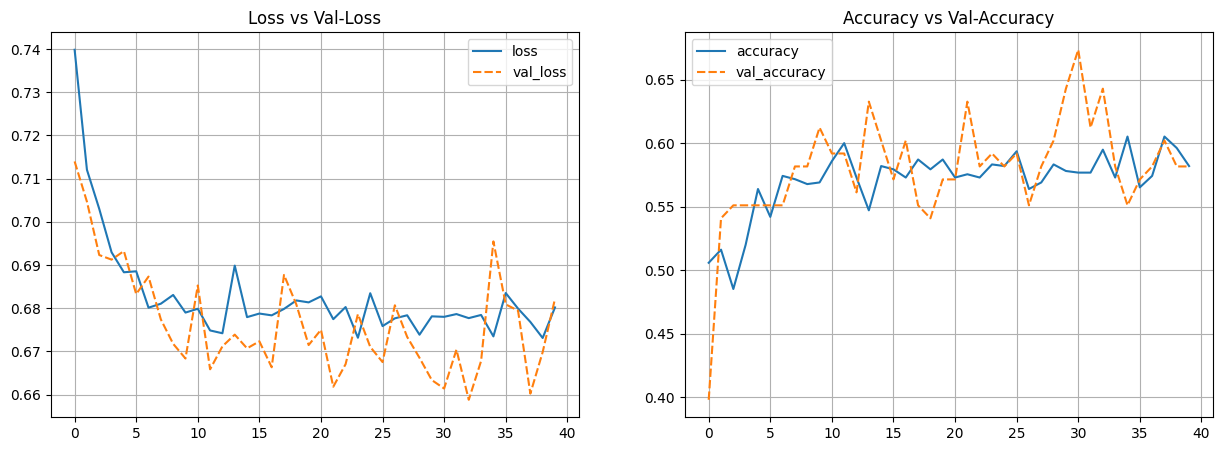

In [90]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### TEST 3 DENSE LAYER

In [91]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [92]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(24, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(12, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(8, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 12)        2604      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         872       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

2025-01-07 00:11:22.749171: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


46/49 [===========================>..] - ETA: 0s - loss: 0.6894 - accuracy: 0.5462

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 178ms/step - loss: 0.6895 - accuracy: 0.5458 - val_loss: 0.6877 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 8s 173ms/step - loss: 0.6897 - accuracy: 0.5394 - val_loss: 0.6869 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 8s 172ms/step - loss: 0.6863 - accuracy: 0.5523 - val_loss: 0.6870 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 8s 168ms/step - loss: 0.6868 - accuracy: 0.5523 - val_loss: 0.6848 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 8s 168ms/step - loss: 0.6885 - accuracy: 0.5523 - val_loss: 0.6850 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 8s 172ms/step - loss: 0.6848 - accuracy: 0.5626 - val_loss: 0.6822 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 8s 171ms/step - loss: 0.6849 - accuracy: 0.5548 - val_loss: 0.6796 - val_accuracy: 0.5510
Epoch 8/40
49/49 

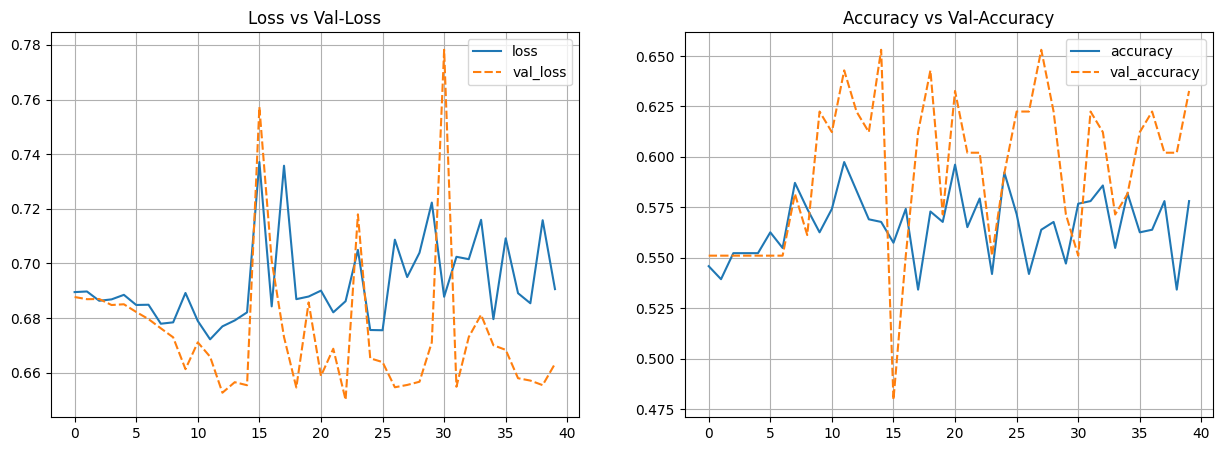

In [93]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

## TEST DROPOUT

```
Test dropout
dropout 0.3
dropout 0.7
SGD with Momentum
Image size 128 x 128 pixels
Batch size 16
Default learning rate
3 hidden layer (24, 12, 8)
1 dense layer
```

### DROPOUT 0.3

In [94]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [95]:
# Create Sequential API model
model = Sequential()
model.add(Conv2D(24, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(12, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(8, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

# Train the model

history = model.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 12)        2604      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         872       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

2025-01-07 00:21:49.835500: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


37/49 [=====================>........] - ETA: 1s - loss: 0.6901 - accuracy: 0.5352

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 184ms/step - loss: 0.6919 - accuracy: 0.5381 - val_loss: 0.6944 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6916 - accuracy: 0.5523 - val_loss: 0.6883 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 8s 170ms/step - loss: 0.6900 - accuracy: 0.5523 - val_loss: 0.6877 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 8s 173ms/step - loss: 0.6899 - accuracy: 0.5523 - val_loss: 0.6901 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 8s 173ms/step - loss: 0.6897 - accuracy: 0.5523 - val_loss: 0.6895 - val_accuracy: 0.5510
Epoch 6/40
49/49 [==============================] - 8s 172ms/step - loss: 0.6898 - accuracy: 0.5510 - val_loss: 0.6887 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 8s 172ms/step - loss: 0.6894 - accuracy: 0.5613 - val_loss: 0.6900 - val_accuracy: 0.5510
Epoch 8/40
49/49 

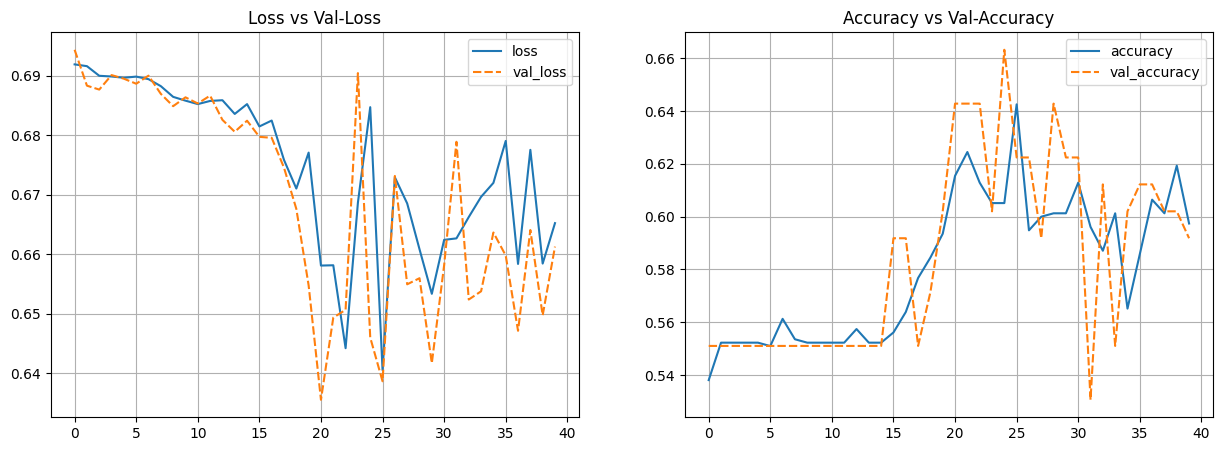

In [96]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

### DROPOUT 0.7 (Best Model)

In [31]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [32]:
# Create Sequential API model
model_best = Sequential()
model_best.add(Conv2D(24, (3,3), padding='same',activation='relu',strides=(1, 1), input_shape=(img_height, img_width,3)))
model_best.add(MaxPooling2D(2, 2))
model_best.add(Conv2D(12, (3,3), padding='same',activation='relu'))
model_best.add(MaxPooling2D(2, 2))
model_best.add(Conv2D(8, (3,3), padding='same',activation='relu'))
model_best.add(MaxPooling2D(2, 2))
model_best.add(Flatten())
model_best.add(Dropout(0.7))
model_best.add(Dense(4, activation='relu'))
model_best.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model_best.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model_best.summary()

# Train the model

history_best = model_best.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 12)        2604      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         872       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0

2025-01-07 01:21:32.748426: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


18/49 [==========>...................] - ETA: 4s - loss: 0.6956 - accuracy: 0.5278

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 9s 178ms/step - loss: 0.6990 - accuracy: 0.4955 - val_loss: 0.6919 - val_accuracy: 0.5204
Epoch 2/40
49/49 [==============================] - 9s 178ms/step - loss: 0.7017 - accuracy: 0.5265 - val_loss: 0.6743 - val_accuracy: 0.6429
Epoch 3/40
49/49 [==============================] - 8s 170ms/step - loss: 0.6875 - accuracy: 0.5368 - val_loss: 0.6833 - val_accuracy: 0.5510
Epoch 4/40
49/49 [==============================] - 8s 174ms/step - loss: 0.6900 - accuracy: 0.5510 - val_loss: 0.6481 - val_accuracy: 0.6531
Epoch 5/40
49/49 [==============================] - 8s 168ms/step - loss: 0.6763 - accuracy: 0.5600 - val_loss: 0.6663 - val_accuracy: 0.6224
Epoch 6/40
49/49 [==============================] - 8s 167ms/step - loss: 0.6615 - accuracy: 0.6077 - val_loss: 0.6372 - val_accuracy: 0.6735
Epoch 7/40
49/49 [==============================] - 8s 168ms/step - loss: 0.6773 - accuracy: 0.5910 - val_loss: 0.6625 - val_accuracy: 0.6429
Epoch 8/40
49/49 

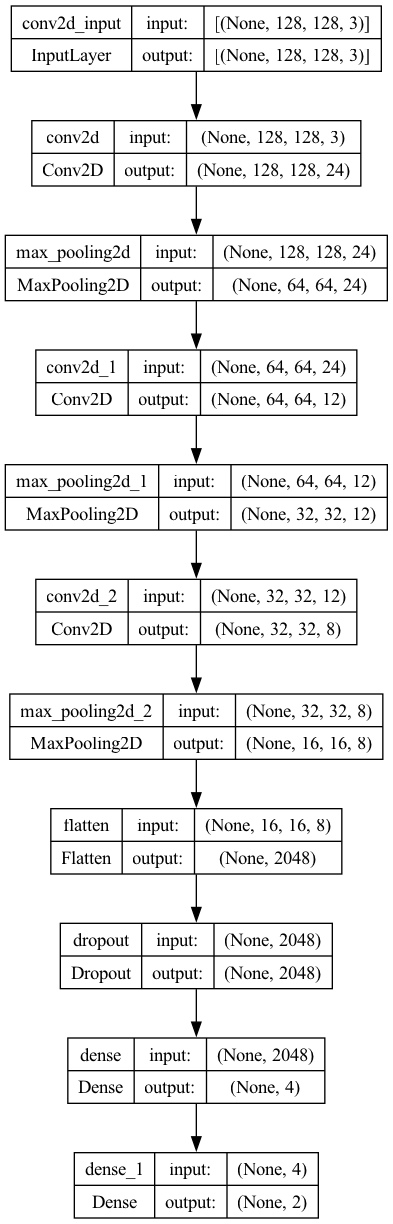

In [33]:
tf.keras.utils.plot_model(model_best, show_shapes=True)

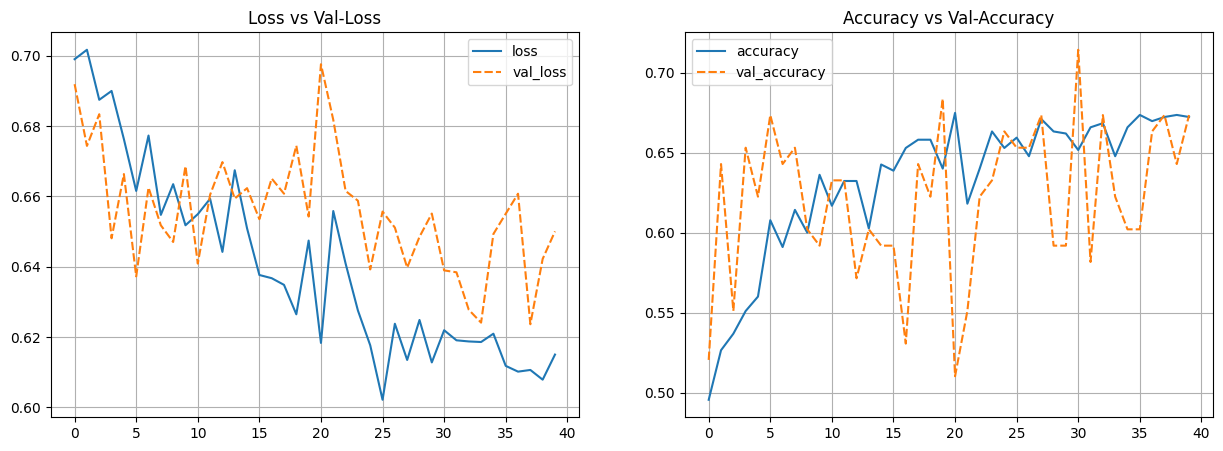

In [34]:
# Plot training results

history_best_df = pd.DataFrame(history_best.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_best_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_best_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

## MODEL TRANSFER LEARNING VGG

```
The default input size for VGG16 is 224x224.
vgg16.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.
```

In [15]:
img_height= 224
img_width= 224
batch_size= 16

In [16]:
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

In [17]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API model
model_tl = Sequential()
model_tl.add(pretrained_model)
model_tl.add(Flatten())
model_tl.add(Dense(512, activation='relu'))
model_tl.add(Dense(2, activation='softmax'))

# Compile
optimizer = SGD(momentum=0.9)
model_tl.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model_tl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 27561282 (105.14 MB)
Trainable params: 12846594 (49.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


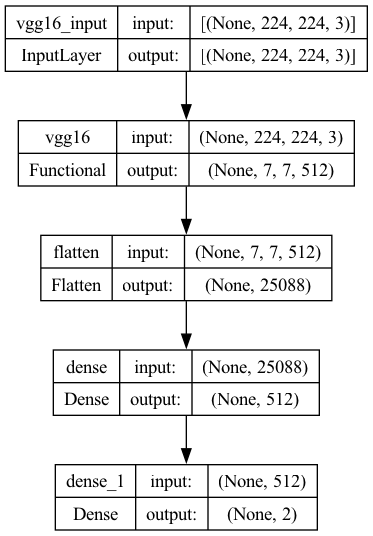

In [18]:
tf.keras.utils.plot_model(model_tl, show_shapes=True)

In [19]:
history_tl = model_tl.fit(train_set_aug, epochs=40, validation_data=val_set_aug, batch_size=batch_size)

Epoch 1/40
47/49 [===========================>..] - ETA: 0s - loss: 321.9856 - accuracy: 0.4791

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 12s 232ms/step - loss: 319.9618 - accuracy: 0.4813 - val_loss: 348.9336 - val_accuracy: 0.5510
Epoch 2/40
49/49 [==============================] - 12s 236ms/step - loss: 741.2552 - accuracy: 0.5252 - val_loss: 228.3024 - val_accuracy: 0.5510
Epoch 3/40
49/49 [==============================] - 12s 236ms/step - loss: 1302.1343 - accuracy: 0.5148 - val_loss: 876.7309 - val_accuracy: 0.4490
Epoch 4/40
49/49 [==============================] - 12s 239ms/step - loss: 914.0835 - accuracy: 0.5200 - val_loss: 1637.9059 - val_accuracy: 0.5510
Epoch 5/40
49/49 [==============================] - 12s 238ms/step - loss: 822.0938 - accuracy: 0.5187 - val_loss: 329.4882 - val_accuracy: 0.4490
Epoch 6/40
49/49 [==============================] - 12s 235ms/step - loss: 1091.8340 - accuracy: 0.5381 - val_loss: 998.1282 - val_accuracy: 0.5510
Epoch 7/40
49/49 [==============================] - 11s 230ms/step - loss: 758.4649 - accuracy: 0.5303 - val_loss: 421.9280 - 

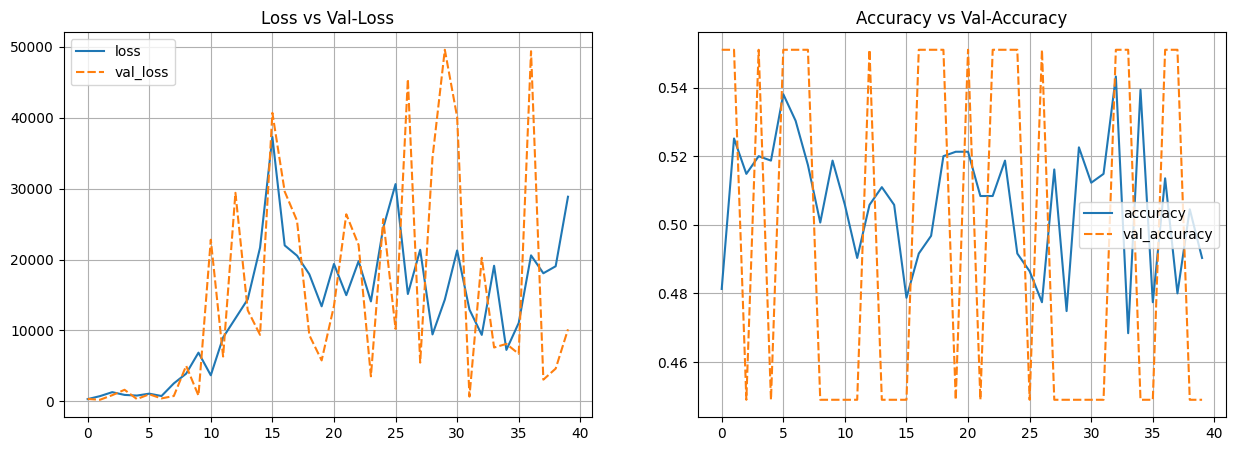

In [20]:
history_tl_df = pd.DataFrame(history_tl.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_tl_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_tl_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

```
From VGG16 transfer learning model accuracy evaluation we can see that it doesn't out perform our previous best model so we will evaluate and save our best model.

VGG16
Train accuracy: 0.4903
Validation accuracy: 0.4490

Our best model
Train accuracy: 0.6723
Validation accuracy: 0.6735
```

# BEST MODEL EVALUATION

In [39]:
# Check the performance of test-set

## Get the probability
y_pred_prob_aug = model_best.predict_generator(test_set)

## Get class with maximum probability
y_pred_class_aug = np.argmax(y_pred_prob_aug, axis=-1)

## Display Classification Report
print(classification_report(test_set_aug.classes, y_pred_class_aug, target_names=np.array(list(train_set_aug.class_indices.keys()))))

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_58838/2056863626.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob_aug = model_best.predict_generator(test_set)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


              precision    recall  f1-score   support

   AiArtData       0.64      0.91      0.75        54
     RealArt       0.76      0.37      0.50        43

    accuracy                           0.67        97
   macro avg       0.70      0.64      0.63        97
weighted avg       0.70      0.67      0.64        97



```
Our best model was tested using the test dataset.

The model's performance is still on the underfitting side.

This may be caused by the lack of significant patterns that differentiate AI-generated images from real pictures.

Test accuracy: 0.67
```

# MODEL SAVING

In [35]:
model_best.save('model_best.keras')

# CONCLUSION

```
Project Summary:

In this project, we successfully developed a machine learning model that classifies images as either AI-generated or real. We evaluated 20 different models using accuracy as the evaluation metric.

Key Learnings:

Preprocessing Steps:

- The model tends to overfit if the dataset is not augmented.
- Higher resolution does not always translate to more useful information, especially since the dataset is sourced through web scraping, leading to highly diverse resolutions.
- Batch size depends on the size of the dataset but cannot be too small.

ANN Modeling:

- The optimizer used in the model affects performance, and for this project, SGD with momentum performed the best out of all optimizers tested.
- The depth and size of the ANN model also influence the results and can be customized to fit the data.

For this project, the best ANN model was:
Dropout: 0.7
Optimizer: SGD with Momentum
Image size: 128 x 128 pixels (training time remained reasonable)
Batch size: 16
Learning rate: Default
Hidden layers: 3 layers (24, 12, 8) using ReLU (best for binary classification)
Dense layer: 1 layer (4 units) using ReLU
Output layer: 2 units using Softmax

Transfer Learning:
- Using VGG16 for this data and purpose is not recommended. The evaluation results showed that VGG16 underfitted the data.

Inference:
- The model successfully predicted 100% of the inference images we provided.
- The model still struggles to classify realistic AI-generated images.

Future Improvements:
- We can experiment with deeper and larger models to better identify patterns.
- Increasing the number of training epochs may help improve performance.
- Testing different optimizers could lead to better results.
```